In [1]:
!pip install vaderSentiment

In [15]:
import matplotlib as mpl
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import re, string, sys
import pandas as pd
import numpy as np
%matplotlib inline
import sys
import seaborn as sns
sns.set_theme(style="whitegrid")
from scipy import stats
import numpy as np

In [3]:
#read all human generated messages
humanmsgfile = '../../../data/00_Scraped_messages/vaping_tweets_cleaned_CTA.csv'
humanmsg_df  = pd.read_csv(humanmsgfile)
print(len(humanmsg_df))
humanmsg_df.head()

1384


,tweets
0,It's #novapenovember - come visit to get free ...
1,just launched the and Education Resource Cente...
2,Just finished up a successful event at the gam...
3,"""The tobacco industrys marketing isnt toward t..."
4,"""These products are ever-changing and easily h..."


In [4]:
#read all generated messages
bloomgenmsgfile_np = '../../../data/01_AI_generated_messages/Total AI-generated messages_no prompt.csv'
bloomgenmsgfile_np_df  = pd.read_csv(bloomgenmsgfile_np)
print(len(bloomgenmsgfile_np_df))
bloomgenmsgfile_np_df.head()

500


,tweets
0,is usually a chemical compound that causes an ...
1,"can be an addictive substance, and there is a ..."
2,"is a highly addictive substance, and it can be..."
3,is an addictive drug and could trigger the ver...
4,is thought to be a more harmful chemical than ...


In [5]:
analyzer = SentimentIntensityAnalyzer()

human_sentiment = []
for sentence in humanmsg_df.tweets:
    vs = analyzer.polarity_scores(sentence)
    #print("{:-<65} {}".format(sentence, str(vs)))
    human_sentiment.append(vs['compound'])
    
    
bloom_sentiment = []
for sentence in bloomgenmsgfile_np_df.tweets:
    vs = analyzer.polarity_scores(sentence)
    bloom_sentiment.append(vs['compound'])

0.08677781791907514
0.5231115149497133
-0.2003836
0.5506013540948115
Ttest_indResult(statistic=10.367761910944571, pvalue=1.5677504639653157e-24)


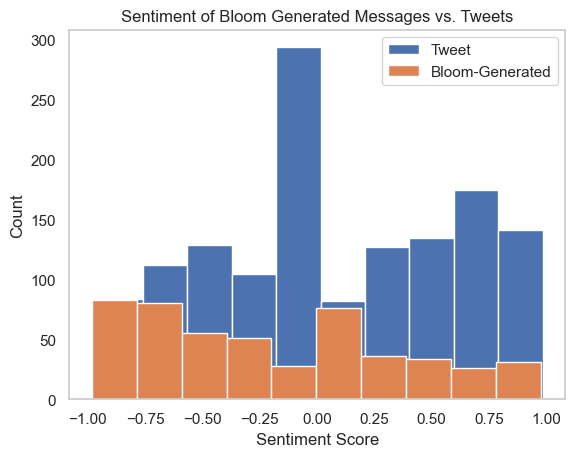

In [20]:
plt.hist(human_sentiment)
plt.hist(bloom_sentiment)
plt.title('Sentiment of Bloom Generated Messages vs. Tweets')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.grid(False)
plt.legend(['Tweet', 'Bloom-Generated'])

print(np.mean(human_sentiment))
print(np.std(human_sentiment))

print(np.mean(bloom_sentiment))
print(np.std(bloom_sentiment))

print(stats.ttest_ind(human_sentiment, bloom_sentiment))

In [8]:
#read selected human generated messages
sel_humanmsgfile = '../../../data/00_Scraped_messages/Selected human-generated tweets.csv'
sel_humanmsgfile_df  = pd.read_csv(sel_humanmsgfile)
print(len(sel_humanmsgfile_df))
sel_humanmsgfile_df.head()

15


,tweets
0,Nicotine in vapes can disrupt neurotransmitter...
1,Vaping is risky. E-cigarettes are highly addic...
2,Its so freeing and fulfilling once you stop cr...
3,Vapes and e-cigarettes increase your risk of a...
4,"Nicotine is highly addictive, and comes in man..."


In [9]:
#read selected generated messages
sel_bloomgenmsgfile_np = '../../../data/01_AI_generated_messages/Selected AI-generated messages_no prompt.csv'
sel_bloomgenmsgfile_np_df  = pd.read_csv(sel_bloomgenmsgfile_np)
print(len(sel_bloomgenmsgfile_np_df))
sel_bloomgenmsgfile_np_df.head()

15


,tweets
0,"a very dangerous chemical, but it's still lega..."
1,"far more potent than in cigarettes, which is w..."
2,a highly addictive substance. Nicotine is the ...
3,"a mixture of nicotine, propylene glycol, glyce..."
4,chemicals that can harm the lungs. These chemi...


In [10]:
analyzer = SentimentIntensityAnalyzer()

human_sentiment2 = []
for sentence in sel_humanmsgfile_df.tweets:
    vs = analyzer.polarity_scores(sentence)
    #print("{:-<65} {}".format(sentence, str(vs)))
    human_sentiment2.append(vs['compound'])
    
    
bloom_sentiment2 = []
for sentence in sel_bloomgenmsgfile_np_df.tweets:
    vs = analyzer.polarity_scores(sentence)
    bloom_sentiment2.append(vs['compound'])

In [11]:
df = pd.DataFrame([human_sentiment2, bloom_sentiment2]).T
df.columns = ['human_sentiment', 'ai_sentiment']
df.head()

,human_sentiment,ai_sentiment
0,0.0000,-0.7874
1,-0.8860,0.1695
2,0.8518,0.0000
3,0.0516,0.0000
4,-0.5256,-0.8360


In [12]:
df.to_csv('sentiment.csv')

In [13]:
import os
os.getcwd()

'/Users/suelim/Documents/Research/Evaluation_Vaping_Messages/scripts/02_computational_analyses/04_Sentiment'

In [17]:
df2 = pd.read_csv('../03_TextCharacteristics/ease.csv')
df2.head()

,Unnamed: 0,human_ease,ai_ease
0,0,63.486154,75.466786
1,1,84.205000,83.853571
2,2,91.567807,78.670769
3,3,56.605714,39.624615
4,4,50.610000,72.163077


### combine dfs (sentiment and ease) and plot 

In [31]:
dfh             = pd.DataFrame()
dfh['rating']   = human_sentiment2
dfh['type']     = 'Human'
dfh['question'] = 'Sentiment'

dfa             = pd.DataFrame()
dfa['rating']   = bloom_sentiment2
dfa['type']     = 'AI'
dfa['question'] = 'Sentiment'

df_sentiment      = dfh.append(dfa)

####

dfh             = pd.DataFrame()
dfh['rating']   = df2.human_ease.values
dfh['type']     = 'Human'
dfh['question'] = 'Reading Ease'

dfa             = pd.DataFrame()
dfa['rating']   = df2.ai_ease.values
dfa['type']     = 'AI'
dfa['question'] = 'Reading Ease'

df_ease      = dfh.append(dfa)

###

df_all = df_sentiment.append(df_ease)
df_all.head()

/var/folders/74/d4n5j0wd00v7rzjzndfvs2g80000gn/T/ipykernel_21322/3431774774.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sentiment      = dfh.append(dfa)
/var/folders/74/d4n5j0wd00v7rzjzndfvs2g80000gn/T/ipykernel_21322/3431774774.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ease      = dfh.append(dfa)
/var/folders/74/d4n5j0wd00v7rzjzndfvs2g80000gn/T/ipykernel_21322/3431774774.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_sentiment.append(df_ease)


,rating,type,question
0,0.0000,Human,Sentiment
1,-0.8860,Human,Sentiment
2,0.8518,Human,Sentiment
3,0.0516,Human,Sentiment
4,-0.5256,Human,Sentiment


In [30]:
df_all.to_csv('sentiment_ease.csv')

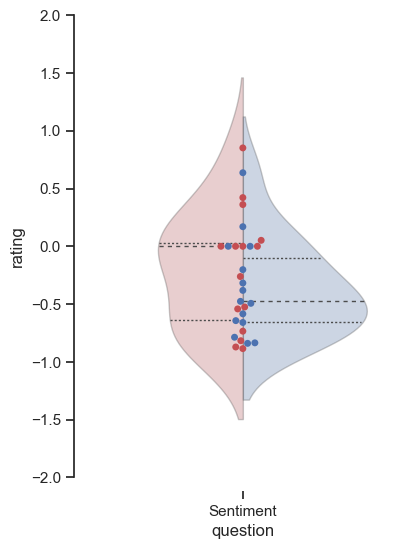

In [27]:
import seaborn as sns
sns.set_style("ticks")


plt.figure(figsize = (4,6))

ax = sns.violinplot(data=df_sentiment, x="question", y="rating", hue="type", 
               split=True, inner="quart", linewidth=1,
               palette={"Human": "r", "AI": "b"});
for violin, alpha in zip(ax.collections[::], [0.3,0.3, 0.3, 0.3]):
    violin.set_alpha(alpha)

sns.swarmplot(data=df_sentiment, 
              x="question", 
              y="rating", 
              hue="type",
              palette={"Human": "r", "AI": "b"});

#plt.legend(bbox_to_anchor=(1.0, 1), borderaxespad=0);
#plt.legend(loc = 2);
plt.legend([],[], frameon=False)
plt.ylim(-2,2);

sns.despine(offset= 10, trim=True);
#plt.yticks(np.arange(1,6))



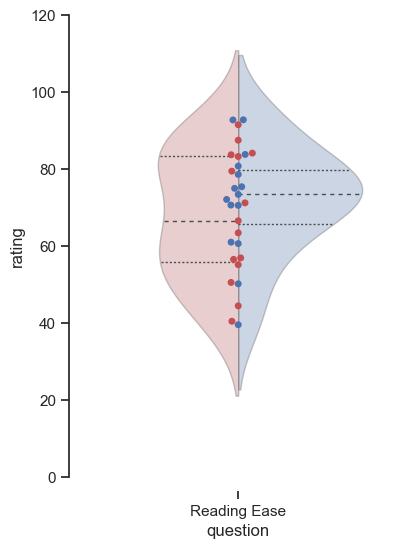

In [36]:
import seaborn as sns
sns.set_style("ticks")


plt.figure(figsize = (4,6))

ax = sns.violinplot(data=df_ease, x="question", y="rating", hue="type", 
               split=True, inner="quart", linewidth=1,
               palette={"Human": "r", "AI": "b"});
for violin, alpha in zip(ax.collections[::], [0.3,0.3, 0.3, 0.3]):
    violin.set_alpha(alpha)

sns.swarmplot(data=df_ease, 
              x="question", 
              y="rating", 
              hue="type",
              palette={"Human": "r", "AI": "b"});

#plt.legend(bbox_to_anchor=(1.0, 1), borderaxespad=0);
#plt.legend(loc = 2);
plt.legend([],[], frameon=False)
plt.ylim(0,120);

sns.despine(offset= 10, trim=True);
#plt.yticks(np.arange(1,6))

